In [1]:
%pip install pandas sqlalchemy psycopg2-binary matplotlib python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\harro\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

try:
    with engine.connect() as conn:
        print("Successfully connected to the database securely!")
except Exception as e:
    print(f"Connection failed: {e}")

Successfully connected to the database securely!


In [3]:
query = """
SELECT 
    d.date_id AS "date",
    ha.happy_mood AS "good day",
    ha.productive,
    he.weight_loss AS "lost weight",
    he.worked_out AS "exercised",
    he.took_vitamins AS "took supplements",
    he.ate_healthy AS "ate healthy",
    ga.health_improvements_made AS "healthy habits",
    ga.read,
    ga.studied_ou,
    ga.studied_de,
    ga.studied_french
FROM metrics_table AS mt
INNER JOIN date AS d
    ON mt.date_id = d.date_id
INNER JOIN happiness AS ha
    ON mt.happiness_metric_id = ha.happiness_metric_id
INNER JOIN health AS he
    ON mt.health_metric_id = he.health_metric_id
INNER JOIN goals_achieved AS ga
    ON mt.goal_metric_id = ga.goal_metric_id
"""

df = pd.read_sql(query, engine)

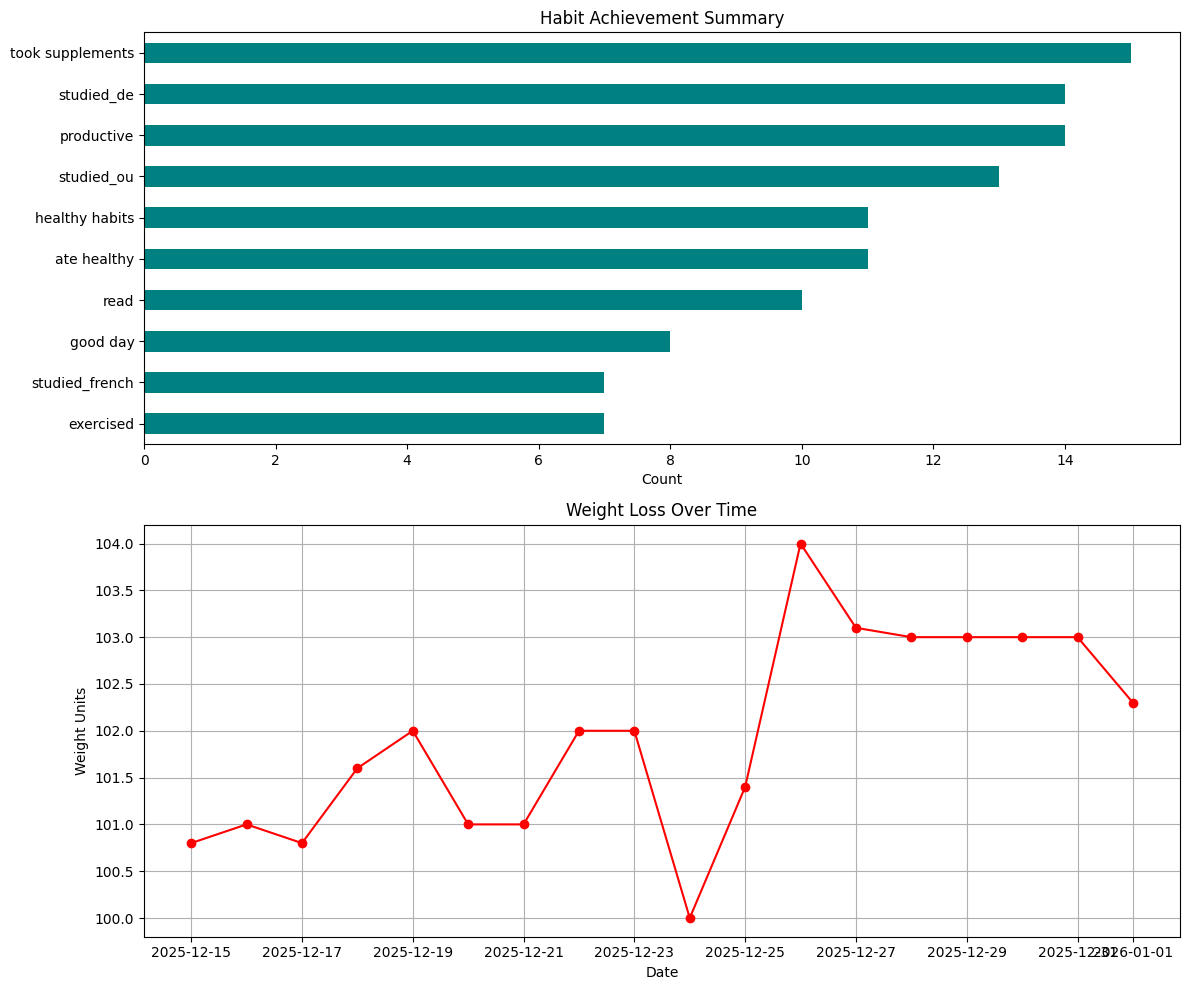

In [4]:
import matplotlib.pyplot as plt

# Summary of all habits
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Habit Summary (Bar Chart)
habit_counts = df.drop(columns=['date', 'lost weight']).sum().sort_values()
habit_counts.plot(kind='barh', ax=ax1, color='teal')
ax1.set_title('Habit Achievement Summary')
ax1.set_xlabel('Count')

# Plot 2: Weight Loss Trend (Line Chart)
ax2.plot(df['date'], df['lost weight'], marker='o', color='red', linestyle='-')
ax2.set_title('Weight Loss Over Time')
ax2.set_ylabel('Weight Units')
ax2.set_xlabel('Date')
ax2.grid(True)

plt.tight_layout()
plt.show()

